#### EMACS LISP STUFF PLEASE IGNORE
(defun switch-to-notebook ()
 (interactive)
 (st-toggle-to-buffer "*ein: http://127.0.0.1:8899/make_figs.ipynb*"))

In [1]:
%pylab inline
import os,sys
from importlib import reload
from copy import deepcopy
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,3)
from matplotlib.gridspec import GridSpec
from scipy.signal import stft
from builtins import sum as bsum
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
probe_locs = [(x,y) for y in [0.1,0.3,0.5,0.7,0.9] for x in [0.45,0.35,0.25,0.15]]
get_probe_ind = lambda x, y: probe_locs.index((x,y))

In [13]:
import units; reload(units); UNITS = units.UNITS
import boulder; reload(boulder)
import crick; reload(crick)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp;             reload(fp)
import utils; reload(utils)
FisherPlumes = fp.FisherPlumes
crick.logger.setLevel(logging.DEBUG)

load_which = "bw"
read_from_file = True
if not read_from_file:
    n_bootstraps = 10

    pairs_mode = "unsigned"
    if load_which == "bw":
        F = FisherPlumes("boulder16", pitch = 25000 * UNITS.um,  freq_max = 20 * UNITS.hertz,
                           which_coords = probe_locs*UNITS.m,
                           py_mode = "relative",
                           suffix='manuscript',
                         pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    else:
        F = FisherPlumes("n12dishT",  pitch = 76000 * UNITS.um, freq_max = 100 * UNITS.hertz,
                       which_coords = [(1.0, 0.5),
                                       #(0.9,0.5),
                                       (0.7,0.5),
                                       #(0.6,0.5)
                                       ]*UNITS.m,
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    data = {
        load_which:F,
    }

    with open(f"data_{load_which}.p", "wb") as f:
        pickle.dump(data, f)
else:
    if load_which == "bw":
        name = "boulder16"
        pitch = 25000 * UNITS.um
    else:
        name = "n12dishT"
        pitch = 76000 * UNITS.um
        
    pint.set_application_registry(UNITS)
    UNITS.define(f"{name}_pitch = {pitch}")    
    data_file = f"data_{load_which}.p"
    with open(data_file, "rb") as f:
        print("Loading from {data_file=}.")
        data = pickle.load(f)

INFO:boulder:Boulder simulation data available for:


INFO:boulder:Re100_0_5mm_50Hz_16source_manuscript.h5         : ['Odor Data/c1a', 'Odor Data/c1b', 'Odor Data/c2a', 'Odor Data/c2b', 'Odor Data/c3a', 'Odor Data/c3b', 'Odor Data/c4a', 'Odor Data/c4b', 'Odor Data/c5a', 'Odor Data/c5b', 'Odor Data/c6a', 'Odor Data/c6b', 'Odor Data/c7a', 'Odor Data/c7b', 'Odor Data/c8a', 'Odor Data/c8b'] (16 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


Loading from file.


# Compute statistics all at once

### Set the desired window size(s) for the analysis

In [15]:
wnd_sec_vals = [0.5 * UNITS.s, 1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s]

### Compute the metrics for the specified window sizes

In [16]:
dmax_um = {"bw":np.inf, "cr":np.inf}
data_wnd = {}
for wnd_sec in wnd_sec_vals:
    wnd = {k:int(F.fs*wnd_sec) for k, F in data.items()}
    istart = {k:0 if k[0] == "b" else 1000 for k, F in data.items()} 
    [(print(k, end = ""),
      sys.stdout.flush(),
      F.compute_all_for_window(wnd = wnd[k],
                               istart = istart[k],
                               window = 'boxcar',
                               tukey_param = 0,
                               dmax_um = dmax_um[k],
                               fit_vars = False,
                               weighting_freq_max = (7 if k == "bw" else 70) * UNITS.Hz,
                               )
      ) for k, F in data.items() if k != "acr"];
    data_wnd[wnd_sec] = deepcopy(data)

bw

           fisher_plumes 2023/05/01 20:52:33     INFO: Window set to self.wnd=25.


           fisher_plumes 2023/05/01 20:52:33     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/01 20:52:33     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/01 20:52:33     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/01 20:52:33     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/01 20:52:35     INFO: Computing lambdas.


           fisher_plumes 2023/05/01 20:52:35    DEBUG: sum(freqs<=fmax)=13.


           fisher_plumes 2023/05/01 20:52:35    DEBUG: data.shape=(11, 2, 7328)


           fisher_plumes 2023/05/01 20:52:35    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/01 20:52:44    DEBUG: utils.d1(self.la[0]).shape=(11, 13)


           fisher_plumes 2023/05/01 20:52:44     INFO: Computing p-values.


           fisher_plumes 2023/05/01 20:52:44     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:53:00     INFO: Computing R^2-values.


           fisher_plumes 2023/05/01 20:53:00     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:53:01     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/01 20:53:01     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/01 20:53:01     INFO: Computed λ for 13 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/01 20:53:01     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/01 20:53:15    DEBUG: self.fit_params[0].shape=(11, 13, 3).


           fisher_plumes 2023/05/01 20:53:15    DEBUG: self.vars_for_freqs[0].shape=(11, 13).


           fisher_plumes 2023/05/01 20:53:15     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/01 20:53:15     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/01 20:53:15    DEBUG: self.I[0].shape=(11, 13, 21) has the expected value.


           fisher_plumes 2023/05/01 20:53:15     INFO: Done computing all for wnd=25.


bw

           fisher_plumes 2023/05/01 20:53:16     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/01 20:53:16     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/01 20:53:16     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/01 20:53:17     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/01 20:53:17     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/01 20:53:18     INFO: Computing lambdas.


           fisher_plumes 2023/05/01 20:53:18    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/01 20:53:18    DEBUG: data.shape=(11, 2, 3808)


           fisher_plumes 2023/05/01 20:53:18    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/01 20:53:28    DEBUG: utils.d1(self.la[0]).shape=(11, 26)


           fisher_plumes 2023/05/01 20:53:28     INFO: Computing p-values.


           fisher_plumes 2023/05/01 20:53:28     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:53:43     INFO: Computing R^2-values.


           fisher_plumes 2023/05/01 20:53:43     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:53:45     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/01 20:53:45     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/01 20:53:45     INFO: Computed λ for 26 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/01 20:53:45     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/01 20:54:03    DEBUG: self.fit_params[0].shape=(11, 26, 3).


           fisher_plumes 2023/05/01 20:54:03    DEBUG: self.vars_for_freqs[0].shape=(11, 26).


           fisher_plumes 2023/05/01 20:54:03     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/01 20:54:03     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/01 20:54:03    DEBUG: self.I[0].shape=(11, 26, 21) has the expected value.


           fisher_plumes 2023/05/01 20:54:03     INFO: Done computing all for wnd=50.


bw

           fisher_plumes 2023/05/01 20:54:04     INFO: Window set to self.wnd=100.


           fisher_plumes 2023/05/01 20:54:04     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/01 20:54:04     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/01 20:54:04     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/01 20:54:04     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/01 20:54:05     INFO: Computing lambdas.


           fisher_plumes 2023/05/01 20:54:05    DEBUG: sum(freqs<=fmax)=51.


           fisher_plumes 2023/05/01 20:54:05    DEBUG: data.shape=(11, 2, 1888)


           fisher_plumes 2023/05/01 20:54:05    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/01 20:54:16    DEBUG: utils.d1(self.la[0]).shape=(11, 51)


           fisher_plumes 2023/05/01 20:54:16     INFO: Computing p-values.


           fisher_plumes 2023/05/01 20:54:16     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:54:33     INFO: Computing R^2-values.


           fisher_plumes 2023/05/01 20:54:33     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:54:35     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/01 20:54:35     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/01 20:54:35     INFO: Computed λ for 51 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/01 20:54:35     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/01 20:55:02    DEBUG: self.fit_params[0].shape=(11, 51, 3).


           fisher_plumes 2023/05/01 20:55:02    DEBUG: self.vars_for_freqs[0].shape=(11, 51).


           fisher_plumes 2023/05/01 20:55:02     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/01 20:55:02     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_tools.py:158: RuntimeWarning: divide by zero encountered in true_divide
  return coef * num1 / den1 / den2
           fisher_plumes 2023/05/01 20:55:02    DEBUG: self.I[0].shape=(11, 51, 21) has the expected value.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
           fisher_plumes 2023/05/01 20:55:02     INFO: Done computing all for wnd=100.


bw

           fisher_plumes 2023/05/01 20:55:03     INFO: Window set to self.wnd=200.


           fisher_plumes 2023/05/01 20:55:03     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/01 20:55:03     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/01 20:55:03     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/01 20:55:03     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/01 20:55:04     INFO: Computing lambdas.


           fisher_plumes 2023/05/01 20:55:04    DEBUG: sum(freqs<=fmax)=101.


           fisher_plumes 2023/05/01 20:55:04    DEBUG: data.shape=(11, 2, 928)


           fisher_plumes 2023/05/01 20:55:04    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/01 20:55:19    DEBUG: utils.d1(self.la[0]).shape=(11, 101)


           fisher_plumes 2023/05/01 20:55:19     INFO: Computing p-values.


           fisher_plumes 2023/05/01 20:55:19     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:55:42     INFO: Computing R^2-values.


           fisher_plumes 2023/05/01 20:55:42     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/01 20:55:45     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/01 20:55:45     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/01 20:55:45     INFO: Computed λ for 101 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/01 20:55:45     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/01 20:56:31    DEBUG: self.fit_params[0].shape=(11, 101, 3).


           fisher_plumes 2023/05/01 20:56:31    DEBUG: self.vars_for_freqs[0].shape=(11, 101).


           fisher_plumes 2023/05/01 20:56:31     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/01 20:56:31     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/01 20:56:31    DEBUG: self.I[0].shape=(11, 101, 21) has the expected value.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes.py:348: RuntimeWarning: invalid value encountered in true_divide
  self.I_weighted_freqs = [Ifi/Isi for Ifi, Isi in zip(Ifreqs, Isum)]
           fisher_plumes 2023/05/01 20:56:31     INFO: Done computing all for wnd=200.


### Set the time window of data that we want to plot

In [158]:
wnd_sec = wnd_sec_vals[3]
data = data_wnd[wnd_sec]

### Whether to save the plots we make and where to put them

In [159]:
SAVEPLOTS = True # Whether to actually make the plots

In [160]:
fig_dir_fun = lambda wnd_sec: f"figs_sens/wnd_{wnd_sec.magnitude:g}sec"
fig_dir = fig_dir_fun(wnd_sec)
if not os.path.exists(fig_dir):
    print(f"Creating {fig_dir=}")
    os.system(f"mkdir -p {fig_dir}")
else:
    print(f"{fig_dir=} already exists.")

Creating fig_dir='figs_sens/wnd_4sec'


# Figure showing an example plume and correlations

In [161]:
DEFAULT   = "default"
isdefault = lambda x: type(x) is str and x == DEFAULT

INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/plumes_demo_bw.pdf.


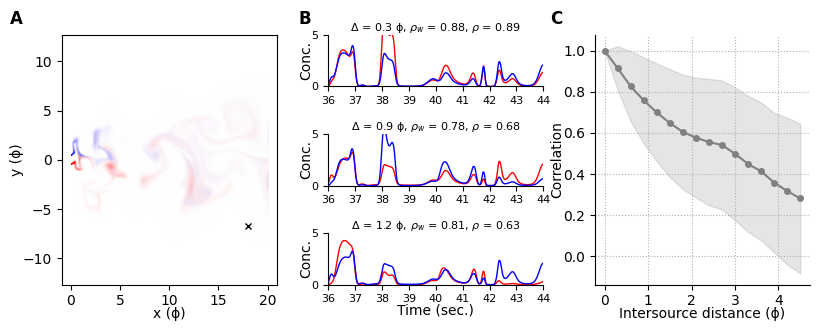

In [162]:
reload(fpf)
reload(fpft)

which_srcs   = {"bw":[-3750, 3750],        "cr":[490000,510000]}
t_wnd        = {"bw":[-4,4]*UNITS.sec,     "cr":[-0.5, 0.5]*UNITS.sec}
which_idists = {"bw":[0,2,3],              "cr":[0,10,20]}
tticks       = {"bw":DEFAULT,              "cr":[39.5,40,40.5]}
xticks       = {"bw":DEFAULT,              "cr":DEFAULT}
yticks       = {"bw":DEFAULT,              "cr":DEFAULT}

for k, F in sorted(data.items()):
    data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], {"bw":"boulder", "cr":"crick"}[k], "saved-snapshots")
    ax_plume, ax_traces, ax_corr = fpf.plot_plumes_demo(F, 40 * UNITS.sec, which_srcs[k], y_lim = (0,5.01),
                                                        t_wnd = t_wnd[k], dt = 1 * UNITS.sec, which_idists=which_idists[k], data_dir=data_dir)
    not isdefault(tticks[k]) and ax_traces[-1].set_xticks(tticks[k])    
    not isdefault(xticks[k]) and ax_plume.set_xticks(xticks[k])
    not isdefault(yticks[k]) and ax_plume.set_yticks(yticks[k])

    fpft.label_axes([ax_plume, ax_traces[0], ax_corr], "ABC", y = [0.99]*3, fontsize=12, fontweight="bold")
    file_name = f"{fig_dir}/plumes_demo_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));    

# Set the probe index we'll use

In [163]:
iprb = 8

# Figure showing the distribution of correlations

bw
Mapped frequencies [ 2  3  7 10] Hz to indices [8, 12, 28, 40].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.py:2358: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=copy, subok=True)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/corr_components_bw.pdf.


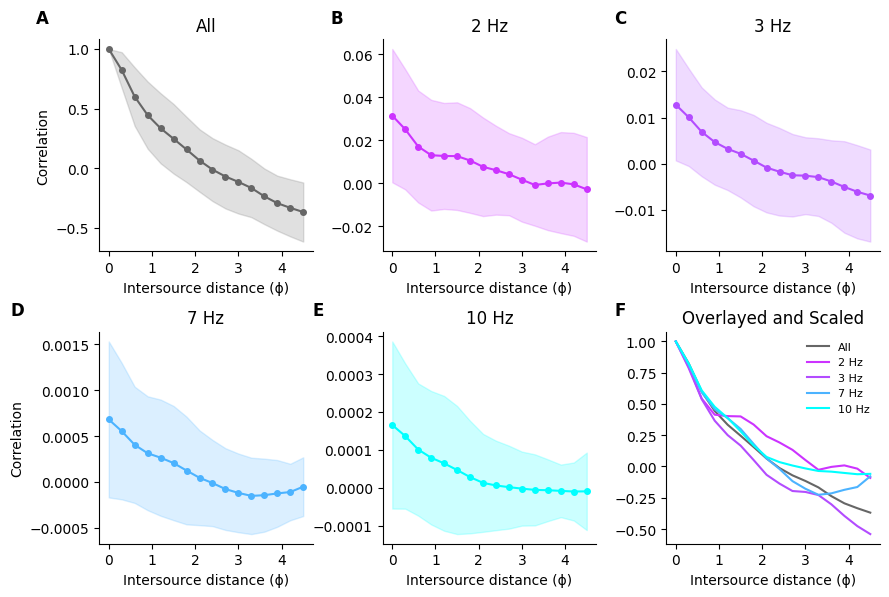

In [164]:
reload(fpf)
which_freqs = [2,3,7,10] * UNITS.hertz
labs = [f"{f}" for f in which_freqs]
cols = {"All":cm.gray(0.4)}; cols.update({l:col for l,col in zip(labs, [cm.cool(1 - f.magnitude/10) for f in which_freqs])})
xlims_  = {"bw":DEFAULT, "cr":DEFAULT}
xticks_ = {"bw":DEFAULT, "cr":DEFAULT}
for k, F in data.items():
    print(k)
    slices = {"All":slice(1,10000)}
    freq_inds = F.freqs2inds(which_freqs)
    print(f"Mapped frequencies {which_freqs} to indices {freq_inds}.")
    slices.update({l:slice(fi, fi+1) for l, fi in zip(labs, freq_inds)})
    ax = fpf.plot_correlations(F.rho[iprb], F.pitch, slices=slices, cols=cols, n_rows = 2, plot_order = ["All"] + labs)
    [(axi.set_xlabel(f"Intersource distance ({fpf.pitch_sym})"),
      not isdefault(xlims_[k])  and axi.set_xlim(xlims_[k]),
      not isdefault(xticks_[k]) and axi.set_xticks(xticks_[k])) for axi in ax]    
    file_name = f"{fig_dir}/corr_components_{k}.pdf"
    fpft.label_axes(ax, "ABCDEF", fontsize=12, fontweight="bold", dy=-0.01)        
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."))

# The Multivariate Gaussian Fits

bw
Mapped 5 Hz to index 20.


Wrote figs_sens/wnd_4sec/coef_vs_coef_bw_5Hz.pdf.


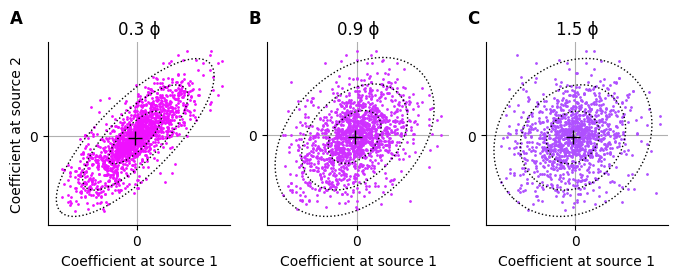

In [165]:
reload(fpf)
which_freqs = {"bw":5 * UNITS.hertz, "cr":5 * UNITS.hertz}
which_idists= {"bw":[0,2,4], "cr":[8,12,18]}
dcol_scales = {"bw":120000,  "cr":80000}
for name, F in sorted(data.items()):
    print(name)
    which_freq = which_freqs[name]
    ifreq = F.freqs2inds([which_freq])[0]
    print(f"Mapped {which_freq} to index {ifreq}.")
    ax = fpf.plot_coef1_vs_coef2([F.ss[iprb], F.cc[iprb]],
                                 ifreq,
                                 F.pairs_um,
                                 F.pitch_units,                                 
                            i_pos_dists_to_plot = which_idists[name],
                            dist_col_scale = dcol_scales[name]
    )
    fpft.label_axes(ax, "ABC", fontsize=12, fontweight="bold", dy=-0.01)            
    file_name = f"{fig_dir}/coef_vs_coef_{name}_{which_freq.magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Supplementary Information

/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/coefs_and_traces_bw_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

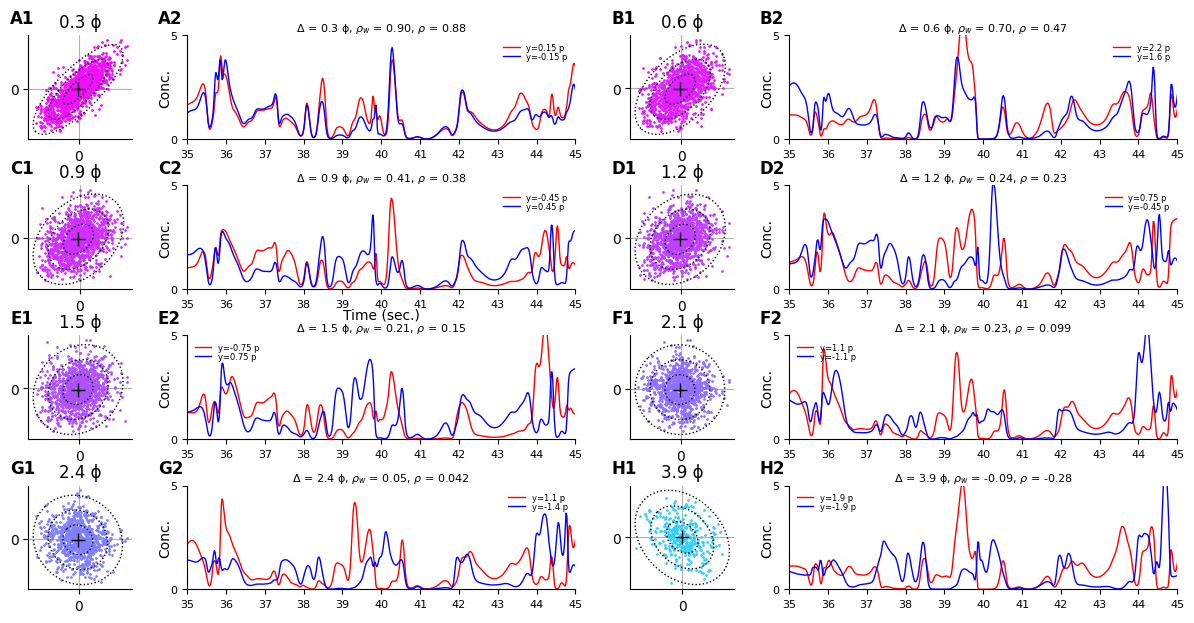

In [166]:
reload(fpf)
reload(fpft)
freq      = {"bw":5 * UNITS.hertz,          "cr":5 * UNITS.hertz}
idists    = {"bw":[0,1,2,3,4,6,7,12],       "cr":[0,4,8,12,16,20,21,22]}
t_lim     = {"bw":[35, 45]*UNITS.sec,       "cr":[39.5,40.5]*UNITS.sec}
dt        = {"bw":1*UNITS.sec,              "cr":0.25*UNITS.sec}
for k, F in sorted(data.items()):
    figure(figsize=(12,6))
    coef_ax, trace_ax = fpf.plot_coef_vs_coef_and_traces(F, freq[k], idists[k],
                                                         which_probe = iprb, n_per_row = 2,
                                                         y_lim=[0,5],
                                                         t_lim = t_lim[k],
                                                         dt = dt[k])
    for ax in coef_ax:
        ax.set_xlabel("")
        ax.set_ylabel("")
    [ax.legend(fontsize=6,labelspacing=0,frameon=False) for ax in trace_ax]
    tight_layout(pad=0)
    all_ax = bsum([[ax_c, ax_t] for ax_c, ax_t in zip(coef_ax, trace_ax)], [])
    n_ax   = len(all_ax)
    fpft.label_axes(all_ax,
                    [ch+nu for ch in "ABCDEFGH" for nu in "12"],
                    align_x = [list(range(i,n_ax,4)) for i in range(4)],
                    align_y = [list(range(i,i+4)) for i in range(0,n_ax,4)],
                    fontsize=12, fontweight="bold", dy=-0.01)
    file_name = f"{fig_dir}/coefs_and_traces_{k}_{freq[k].to(UNITS.hertz).magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Asymmetric Laplacian Fits

d=7500 @ Freq #   4: -np.log10(p) = 9.985
d=15000 @ Freq #   4: -np.log10(p) = 8.384


d=22500 @ Freq #   4: -np.log10(p) = 8.922
Setting extent to [-0.5, 15.5, 0.125, 20.875].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/alap_fits_bw_1Hz.pdf.
d=7500 @ Freq #  20: -np.log10(p) = 2.052
d=15000 @ Freq #  20: -np.log10(p) = 3.691
d=22500 @ Freq #  20: -np.log10(p) = 1.544
Setting extent to [-0.5, 15.5, 0.125, 20.875].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/alap_fits_bw_5Hz.pdf.
d=7500 @ Freq #  40: -np.log10(p) = 12.684
d=15000 @ Freq #  40: -np.log10(p) = 6.274
d=22500 @ Freq #  40: -np.log10(p) = 5.371
Setting extent to [-0.5, 15.5, 0.125, 20.875].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_4sec/alap_fits_bw_10Hz.pdf.


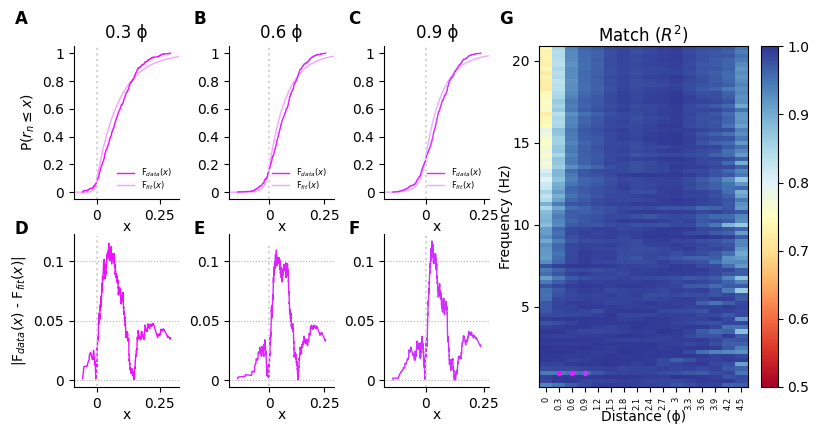

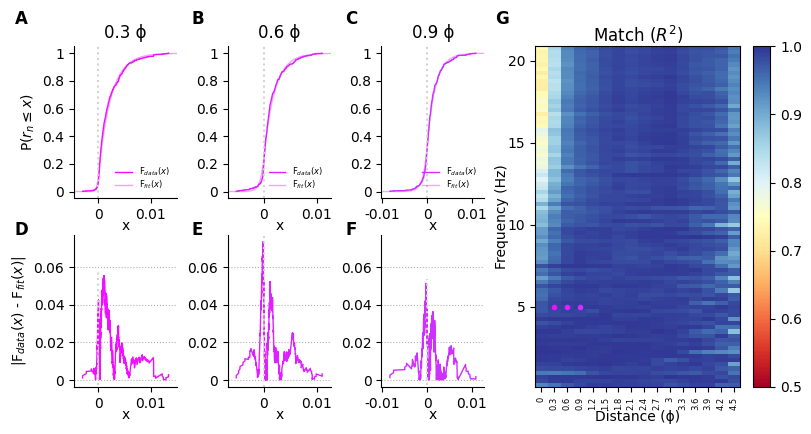

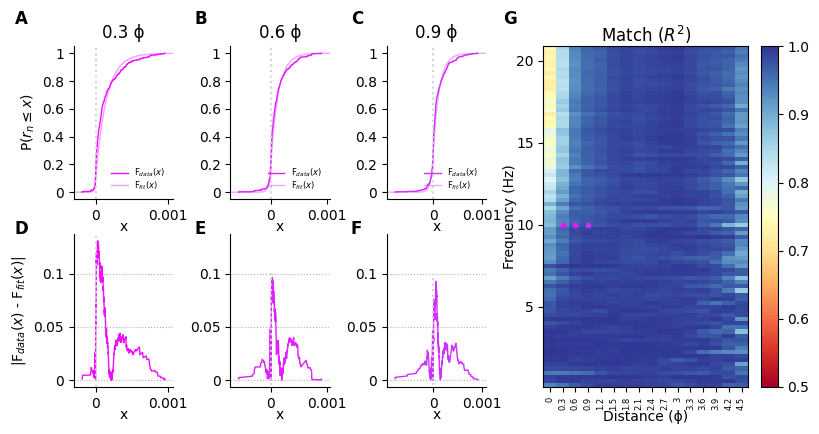

In [167]:
reload(fpft)
reload(fpf)
which_wnd_sec = wnd_sec_vals[0]
idist     = {"bw":[1,2,3],       "cr":[1,13,19]}
freq_max  = {"bw":21 * UNITS.hertz,            "cr":101 * UNITS.hertz}
vmin      = {"bw":[0,0.5],       "cr":[0,0.5]}
vmax      = {"bw":[50,1],        "cr":[10,1]}
plot_pvals= False
for name, F in sorted(data.items()):
    d = np.array(list(F.rho[iprb].keys()))
    d = np.sort(d[d>=0])
    for f in [1, 5, 10] * UNITS.hertz:
        which_freq = {"bw":f, "cr":f}
        ax_cdf, ax_dcdf, ax_hm = fpf.plot_alaplace_fits(F, d[idist[name]],
                                                        which_probe = iprb,
                               ifreq_lim = [1, F.freqs2inds([freq_max[name]])[0]],
                               which_ifreq = F.freqs2inds([which_freq[name]])[0],
                                                        figsize=(8,4),
                                                        vmax=vmax[name],
                                                        vmin=vmin[name],
                                                        plot_dvals=True,
                                                        plot_pvals=plot_pvals)
        tight_layout(pad=0)
        fpft.label_axes(ax_cdf + ax_dcdf + ax_hm, "ABCDEFGHIJK",
                        align_y = [[0,1,2,6],[3,4,5,7]] if plot_pvals else [[0,1,2],[3,4,5]],
                        align_x = [[0,3],[1,4],[2,5]],
                        fontsize=12, fontweight="bold", dy=0)
        file_name = f"{fig_dir}/alap_fits_{name}_{which_freq[name].to(UNITS.hertz).magnitude}Hz.pdf"
        SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Plot the figure showing λ(s)

      fisher_plumes_figs 2023/05/02 00:01:20     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[8, 12, 28, 40], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)
/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  log_scale and plt.gca().set_xticklabels(f"{10**xti:.2g}" for xti in xt)
/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:428: UserWarning: FixedFormatter should only be used together with FixedLocator
  log_scale and plt.gca().set_yticklabels(f"{10**yti:.2g}" for yti in yt)


Wrote figs_sens/wnd_4sec/la_vs_s_fits_bw.pdf.


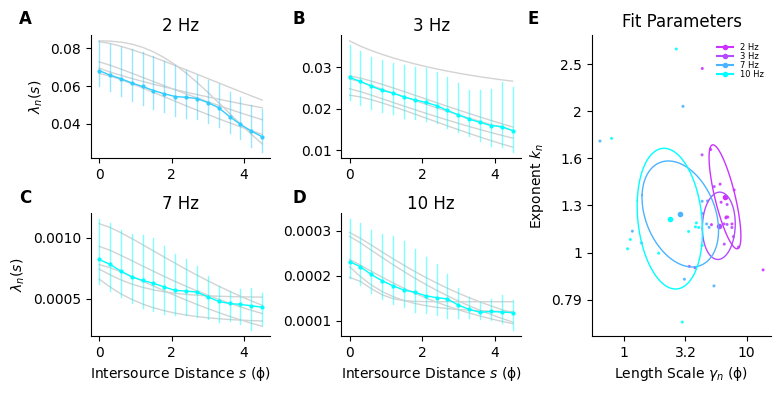

In [168]:
reload(fpft)
reload(fpf)
xl     = {"bw":(-10,200),                 "cr": (-2, 50)}
freqs  = {"bw":[2,3,7,10] * UNITS.hertz,  "cr": [1,3,7,10] * UNITS.hertz}
xt     = {"bw":arange(0,201,50),          "cr": arange(0,101,25)}
xtp    = {"bw":np.array([60,90,135]),     "cr": np.array([40,60, 90, 135])}
ytp    = {"bw":np.array([0.8,1,1.2,1.5]), "cr": np.array([0.8,1,1.2,1.5,2])}
for k, F in sorted(data.items()):
    ax = fpf.plot_la_gen_fits_vs_distance(F, 
                                          figsize=(8,4), legloc = 'right',
                                          log_scale = True,
                                          scatter_size=1.5,
                                          which_ifreqs = F.freqs2inds(freqs[k]))
    [((i>1) and axi.set_xlabel(f"Intersource Distance $s$ ({fpf.pitch_sym})")) for i, axi in enumerate(ax[:4])]
    tight_layout(h_pad=1,w_pad=0.5)
    fpft.label_axes(ax, "ABCDEFGHIJK",
                    align_y = [[0,1,4],[2,3]],
                    align_x = [[0,2],[1,3]],
                    fontsize=12, fontweight="bold", dy=-0.02)                        
    file_name = f"{fig_dir}/la_vs_s_fits_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Plot the Fisher Information

      fisher_plumes_figs 2023/05/02 00:01:25     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_tools.py:158: RuntimeWarning: divide by zero encountered in true_divide
  return coef * num1 / den1 / den2


      fisher_plumes_figs 2023/05/02 00:01:26     INFO: Plotting which_ifreqs=[8, 16, 32, 40, 80].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:548: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_fisher.set_xticklabels(ax_fisher.get_xticklabels(), fontsize=8)
/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:550: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax_fisher.set_xlim(np.floor(d0/d_scale), np.ceil(d1/d_scale))
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.

Wrote figs_sens/wnd_4sec/fisher_info_bw.pdf.


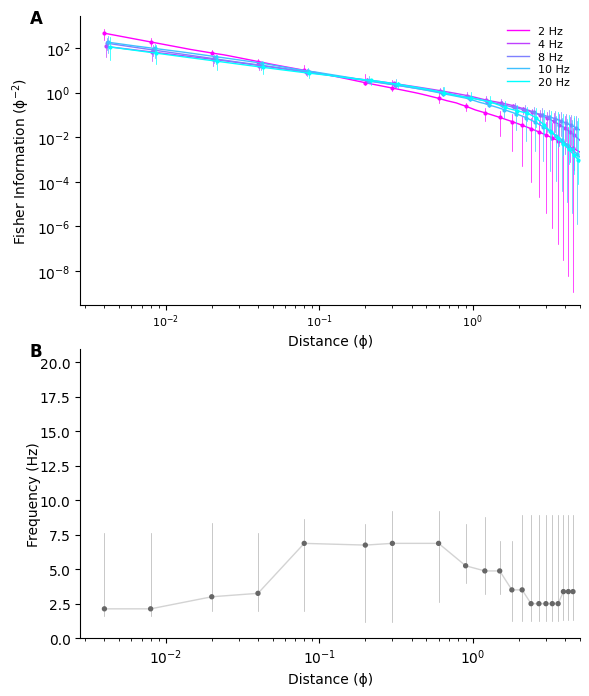

In [169]:
reload(fpt)
reload(fpft)
reload(fpf)
freqs["bw"] = [2,4, 8, 10, 20] * UNITS.hertz
freqs["cr"] = [5,10,20,50,100] * UNITS.hertz
freq_max  = {"bw":20 * UNITS.hertz, "cr":100 * UNITS.hertz}
colscale  = {"bw":10, "cr":40}
d_vals_um = {"bw":[1,5,50], "cr":[0.1,10,70]}
d_lim_um  = {"bw":[100, 125000 ], "cr":[100, 125000]}
bf_ytick  = {"bw":[0,5,10], "cr":[0,50,100]}
bf_yl     = {"bw":[0,21], "cr":[-5,100]}
for k, F in sorted(data.items()):
    figure(figsize=(6,7))
    ax_fisher, ax_best_freq, ax_d = fpf.plot_fisher_information(F,
                                                                which_probe = iprb,
                                                                d_lim_um   = d_lim_um[k],
                                                                d_vals_um  = np.array(d_vals_um[k])*1000,
                                                                d_space_fun  = lambda d0,d1,n:np.logspace(log10(d0),log10(d1),n),
                                                                which_ifreqs = F.freqs2inds(freqs[k]),
                                                                x_stagger = lambda x, i: x*(1.02**i),
                                                                fi_scale  = 1, plot_fun = plt.loglog,
                                                                log_scale = True,
                                                                #freq_max  = freq_max[k],
                                                                colfun    = lambda f: cm.cool_r(f/colscale[k]),
                                                                #bf_ytick  = bf_ytick[k],
    )
    tight_layout(h_pad=0,w_pad=0)
    fpft.label_axes([ax_fisher, ax_best_freq] + ax_d , "ABCDEFGHIJK",
                    #align_y = [[2,3,4]],
                    align_x = [[0,1]],
                    fontsize=12, fontweight="bold", dy=-0.01)
    ax_best_freq.set_ylim(bf_yl[k])
    file_name = f"{fig_dir}/fisher_info_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));
    

# Plot best frequency for each probe

/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs_sens/wnd_0.5sec/best_freq_bw.pdf.


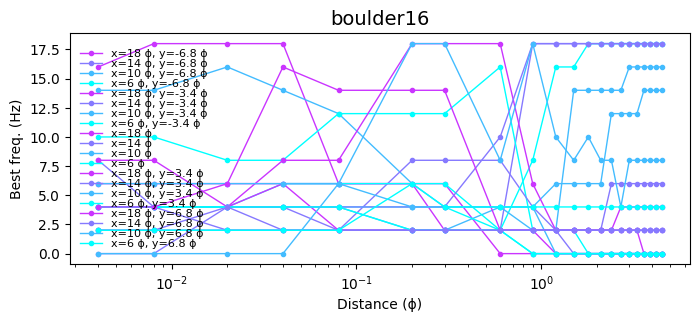

In [33]:
for k, F in sorted(data.items()):
    probe_coords = utils.d1(F.sims).get_used_probe_coords()
    probe_xcoords_sorted = sorted([p[0] for p in probe_coords])
    probe_names = utils.d1(F.sims).coord_strs
    n_probes = len(probe_coords)
    figure(figsize=(8,3))
    dd = F.I_dists/F.pitch.to(UNITS.um).magnitude
    for which_probe, (px,py) in enumerate(probe_coords):
        semilogx(dd, median(F.freqs[F.I_best_ifreqs[which_probe]][1:],axis=0),
                 "o-",markersize=3, linewidth=1, color = cm.cool(probe_xcoords_sorted.index(px)/max((n_probes-1),1)), label=probe_names[which_probe])
    xlabel("Distance (ϕ)")
    ylabel("Best freq. (Hz)")
    title(F.name, fontsize=14)
    legend(frameon=False, labelspacing=0, fontsize=8)
    file_name = f"{fig_dir}/best_freq_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));
        


# Plot the Power in each Signal

Wrote figs/wnd_1sec/spectra.pdf.


Wrote figs/wnd_2sec/spectra.pdf.


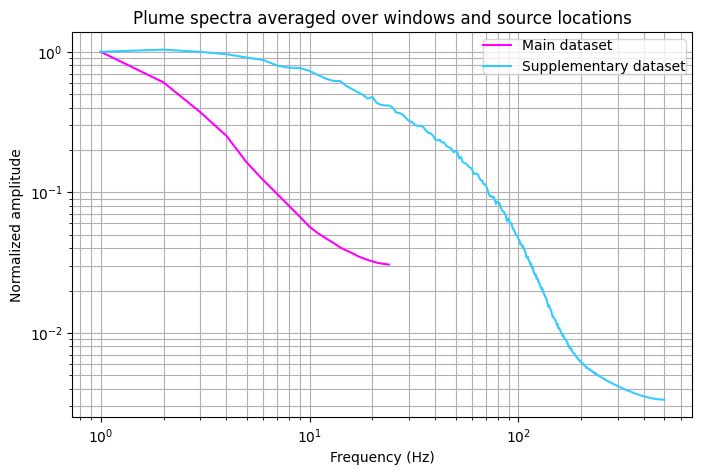

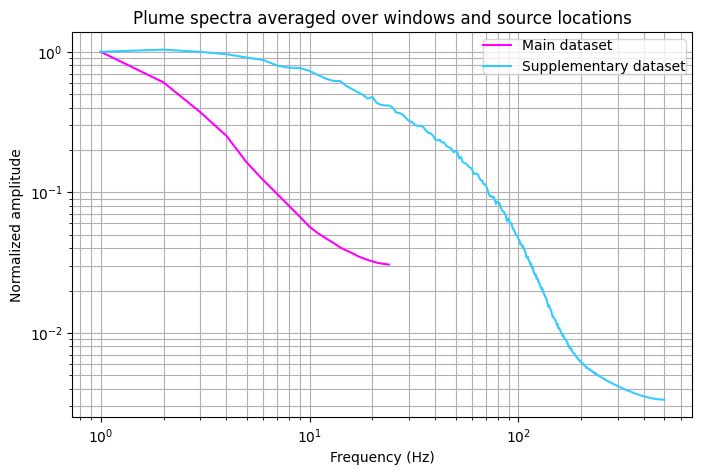

In [23]:
for wnd_in_sec, dataw in data_wnd.items():
    figure(figsize=(8,5))
    for k, F in sorted(dataw.items()):
        f = []
        for _, s in F.sims.items():
            fs = F.fs.to(UNITS.hertz).magnitude
            fr, ti, S = stft(s.data[:,iprb], fs = fs, window='boxcar',
                             nperseg=int(fs), noverlap=fs//2, boundary=None, padded=False)
            f.append(np.abs(S))
            
        f = np.array(f)
        a = np.mean(f,axis=-1).mean(axis=0)    
        loglog(fr[fr<fs/2][1:],a[fr<fs/2][1:]/a[1], label="Supplementary dataset" if k=="cr" else "Main dataset", color={"bw":cm.cool_r(0.0), "cr":cm.cool_r(0.8)}[k])
    legend(borderpad=0)
    xlabel("Frequency (Hz)")
    ylabel("Normalized amplitude")
    title("Plume spectra averaged over windows and source locations")
    grid(True, which='both')
    file_name = f"{fig_dir_fun(wnd_in_sec)}/spectra.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Sandbox

In [23]:
from boulder import concs2rgb

In [18]:
k = "bw"
F = data["bw"]

In [20]:
os.environ["FISHER_PLUMES_DATA"]

'/camp/home/tootoos/working/tootoos/data/fisher-plumes'

In [31]:
t_snapshot = 40 * UNITS.sec
data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], {"bw":"boulder", "cr":"crick"}[k], "saved-snapshots")
mean_subtract_y_coords = True
to_pitch = lambda x: x.to(UNITS(F.pitch_units)).magnitude

In [33]:
m = np.array([mean(I,axis=0) for I in F.I_best_freqs])

<ipython-input-33-e8b88a4d60de>:1: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  m = np.array([mean(I,axis=0) for I in F.I_best_freqs])


In [38]:
to_pitch(coords[0][0])

18.0

In [39]:
coords = [(to_pitch(x), to_pitch(y)) for (x,y) in F.sim0.get_used_probe_coords()]

In [40]:
coords

[(18.0, -6.75),
 (14.0, -6.75),
 (10.0, -6.75),
 (6.0, -6.75),
 (18.0, -3.37),
 (14.0, -3.37),
 (10.0, -3.37),
 (6.0, -3.37),
 (18.0, 0.01),
 (14.0, 0.01),
 (10.0, 0.01),
 (6.0, 0.01),
 (18.0, 3.37),
 (14.0, 3.37),
 (10.0, 3.37),
 (6.0, 3.37),
 (18.0, 6.75),
 (14.0, 6.75),
 (10.0, 6.75),
 (6.0, 6.75)]

In [47]:
x1_fig

-3.598337146724243

In [48]:
x

6.0

In [49]:
width_fig

0.04543843253520663

In [50]:
height_fig

0.04543010752688126

In [56]:
extent

[0.0, 20.0, -8.45, 8.45]

In [107]:
wnds = sorted(data_wnd.keys())
wnds

[0.5 <Unit('second')>,
 1 <Unit('second')>,
 2 <Unit('second')>,
 4 <Unit('second')>]

INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


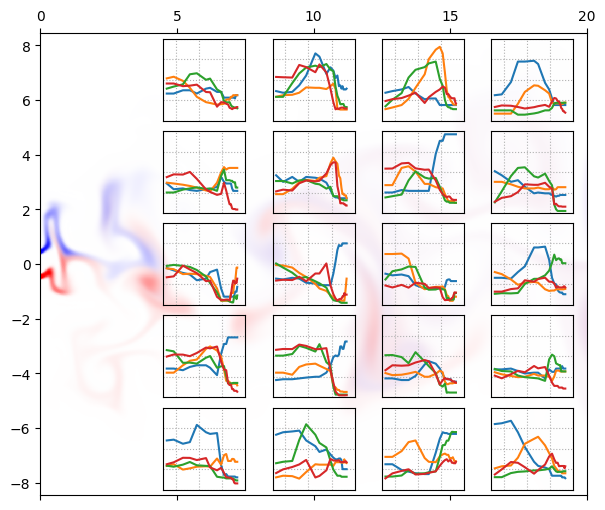

In [114]:
fields = F.load_saved_snapshots(t = t_snapshot.to(UNITS.sec).magnitude, data_dir = data_dir)
figure(figsize=(16,6))
which_keys = [-3750,3750]
pp = concs2rgb(fields[which_keys[0]], fields[which_keys[1]])
dy = (F.sim0.y_lim[1] + F.sim0.y_lim[0])/2 if mean_subtract_y_coords else 0
extent = [to_pitch(x) for x in F.sim0.x_lim] + [to_pitch(y - dy) for y in F.sim0.y_lim]
dx = extent[1] - extent[0]
dy = extent[3] - extent[2]
matshow(pp, extent = extent, fignum=False)
ax = gca()
m = np.array([[mean(I.magnitude,axis=0) for I in data_wnd[w]["bw"].I_best_freqs] for w in wnds]).transpose([1,0,2])
axi = []
aw = 3
for mi, (x,y) in zip(m, coords):
    axi.append(ax.inset_axes(bounds=[(x - extent[0] - aw/2)/dx, (y - extent[2]-aw/2)/dy, aw/dx,aw/dy]))
    for ii, mii in enumerate(mi[0:]):
        axi[-1].plot(log10(F.I_dists/F.pitch.magnitude), mii, color=f"C{ii+0}",
                    )
    axi[-1].set_ylim(0,20)
    axi[-1].set_xticks(log10([0.01,0.1,1,10]),labels=[])
    axi[-1].set_yticks([0,5,10,15,20],labels=[])
    axi[-1].grid(True, linestyle=":")
    axi[-1].patch.set_alpha(0.)
    axi[-1].xaxis.set_tick_params(width=0); axi[-1].yaxis.set_tick_params(width=0)
    #[axi[-1].spines[u].set_visible(False) for u in ["top","right"]]


In [120]:
data_wnd[1.0 * UNITS.s]["bw"].sim0.data.shape

(3001, 20)

In [116]:
data_wnd[0.5 * UNITS.s]["bw"].freqs

Magnitude,[0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.000000000000002 16.0 18.0 20.0 22.0 24.0 26.0 28.000000000000004 30.0 32.0 34.0 36.0 38.0 40.0 42.0 44.0 46.0 48.0]
Units,Hz
